In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.__version__

'2.0.1'

In [11]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [3]:
all_df = pd.read_pickle("all_df.pkl")

In [4]:
all_df["Unit1"].unique()

array([ 0., nan,  1.])

In [7]:
all_df["HospAdmTime"]

0        -98.60
1        -98.60
2        -98.60
3        -98.60
4        -98.60
          ...  
766879    -0.03
766880    -0.03
766881    -0.03
766882    -0.03
766883    -0.03
Name: HospAdmTime, Length: 766884, dtype: float64

In [12]:
profile = ProfileReport(all_df, title="Pandas Profiling Report")

In [13]:
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [85]:
ids = all_df[~all_df["Unit1"].isna()]["patient id"].unique()

In [25]:
for patient in ids:
    filtered = all_df[all_df["patient id"] == patient]
    if len(filtered["Unit1"].unique()) > 1:
        print(patient, "unit 1")
    if len(filtered["Unit2"].unique()) > 1:
        print(patient, "unit 2")

In [81]:
profile.to_widgets()

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
all_df["any_sepsis"] = all_df.groupby('patient id')['SepsisLabel'].transform(lambda x: 1 if x.any() else 0)

,HR
patient id,
0,60.954545
1,89.121212
2,74.828571
3,76.559524
4,98.613636
...,...
19995,104.407407
19996,63.714286
19997,74.928571


In [52]:
hr_mean = all_df.groupby(["patient id"])["HR"].mean().to_frame()
hr_mean = hr_mean.merge(all_df[["patient id", "any_sepsis"]] , on="patient id").drop_duplicates()
hr_mean

,patient id,HR,any_sepsis
0,0,60.954545,0
23,1,89.121212,1
57,2,74.828571,0
93,3,76.559524,0
138,4,98.613636,0
...,...,...,...
766703,19995,104.407407,0
766732,19996,63.714286,0
766775,19997,74.928571,0
766789,19998,83.666667,0


In [56]:
hr_mean["HR"].mean()

83.8419883037761

In [87]:
%matplotlib inline  

def plot(feature):
    feature_mean = all_df.groupby(["patient id"])[feature].mean().to_frame()
    feature_mean = feature_mean.merge(all_df[["patient id", "any_sepsis"]] , on="patient id").drop_duplicates()
    plt.hist(feature_mean[feature_mean['any_sepsis'] == 0][feature], label="Non sick")
    plt.hist(feature_mean[feature_mean['any_sepsis'] == 1][feature], label="sick")
    plt.xlabel(feature)
    plt.title(f"{feature} distribution of sick and non sick patient")
    plt.legend()
    plt.show()

In [88]:
def plot_scatter(feature):
    feature_mean = all_df.groupby(["patient id"])[feature].mean().to_frame()
    feature_mean = feature_mean.merge(all_df[["patient id", "any_sepsis"]] , on="patient id").drop_duplicates()
    plt.scatter(y=feature_mean[feature_mean['any_sepsis'] == 0][feature].sort_values(), x = list(range(len(feature_mean[feature_mean['any_sepsis'] == 0]))), label="Non sick")
    plt.scatter(y=feature_mean[feature_mean['any_sepsis'] == 1][feature].sort_values(), x = list(range(len(feature_mean[feature_mean['any_sepsis'] == 1]))), label="sick")
    plt.xlabel(feature)
    plt.title(f"{feature} distribution of sick and non sick patient")
    plt.legend()
    plt.show()

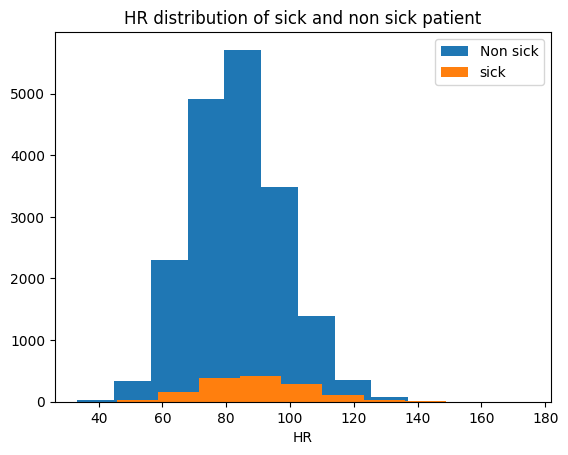

In [62]:
plot("HR")

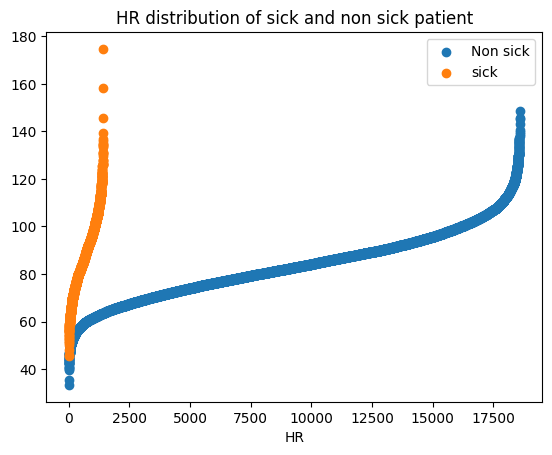

In [89]:
plot_scatter("HR")

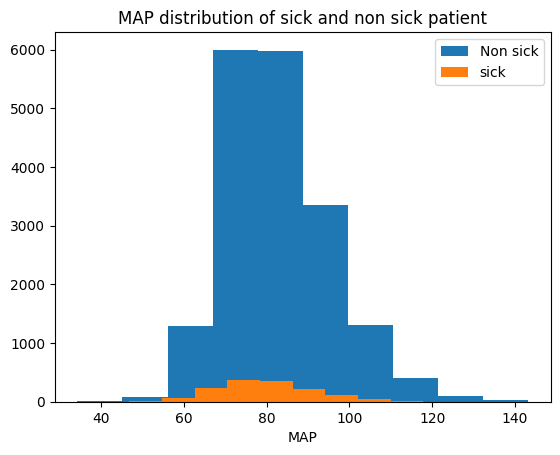

In [63]:
plot("MAP")

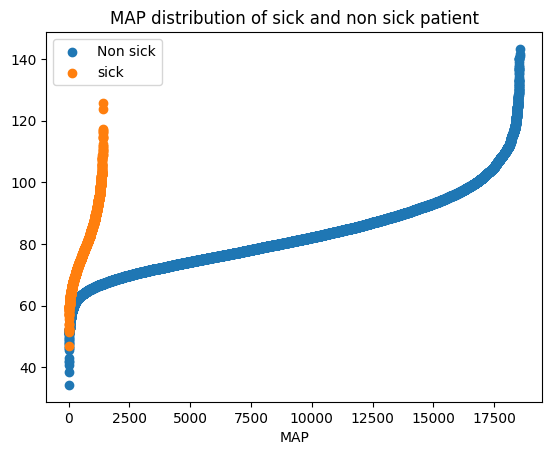

In [91]:
plot_scatter("MAP")

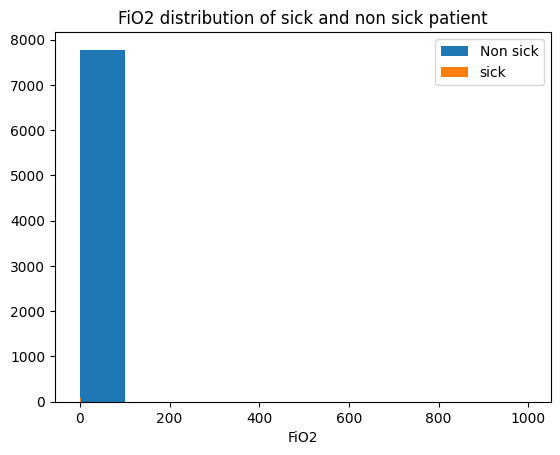

In [64]:
plot("FiO2")

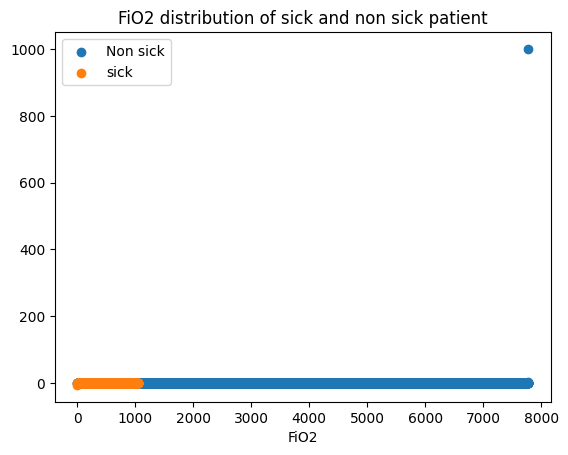

In [92]:
plot_scatter("FiO2")

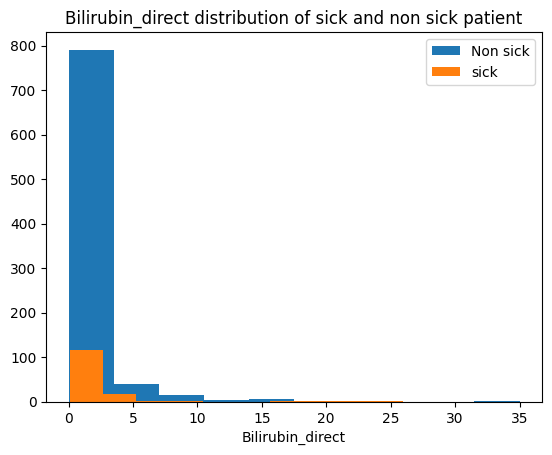

In [69]:
plot("Bilirubin_direct")

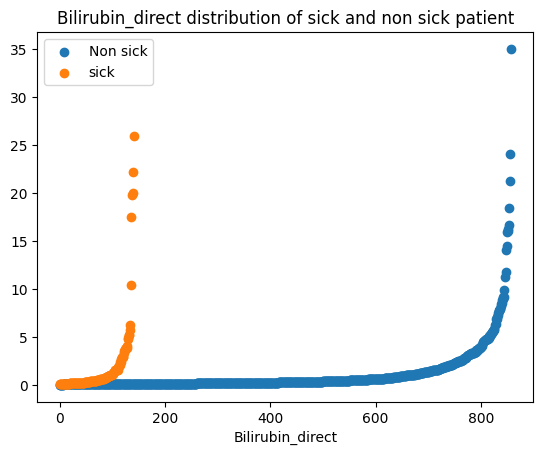

In [80]:
plot_scatter("Bilirubin_direct")

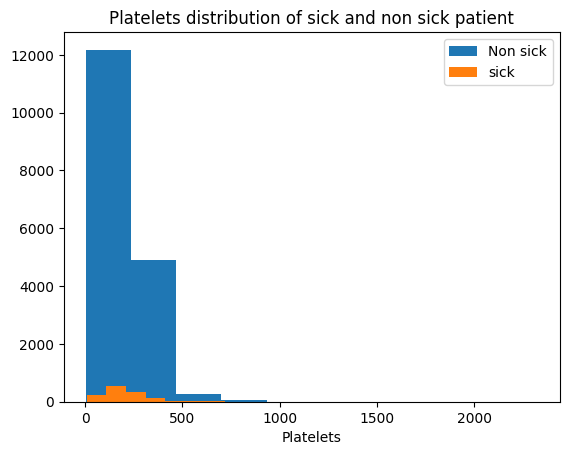

In [73]:
plot("Platelets")

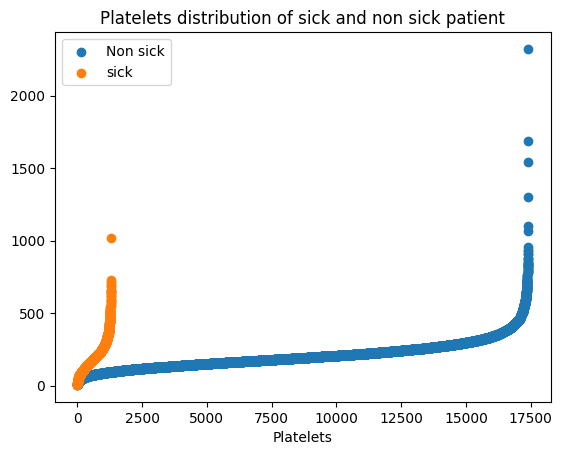

In [93]:
plot_scatter("Platelets")

In [67]:
all_df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'patient id', 'any_sepsis'],
      dtype='object')

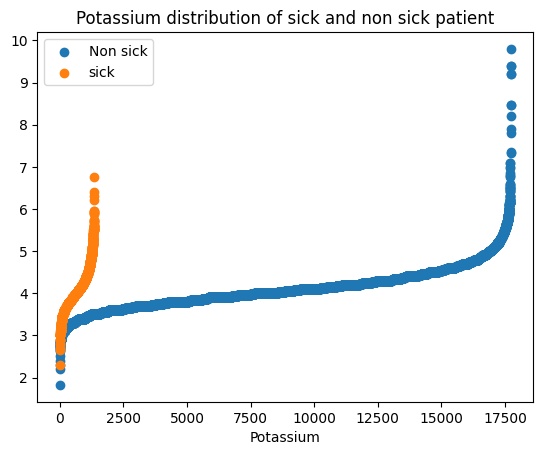

In [96]:
plot_scatter("Potassium")

In [ ]:
plot_scatter("Potassium")

In [6]:
corrs = all_df.corr()
corr_matrix = np.triu(corrs, k=1)
corr_filtered = pd.DataFrame(corr_matrix, columns=all_df.columns, index=all_df.columns)
corr_filtered = corr_filtered[((corr_filtered >= 0.5) & (corr_filtered != 1)) | (corr_filtered <=-0.5)]

In [7]:
corr_filtered

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,patient id,any_sepsis
HR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O2Sat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SBP,NaN,NaN,NaN,NaN,0.781797,0.542135,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAP,NaN,NaN,NaN,NaN,NaN,0.851482,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Resp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EtCO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BaseExcess,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HCO3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dict_filtered = corr_filtered.to_dict()

In [19]:
import math

In [21]:
not_nan_corrs = {}
for k_out,v_out in dict_filtered.items():
    for k_in, v_in in v_out.items():
        if not math.isnan(v_in):
            not_nan_corrs[(k_out, k_in)] = v_in

In [23]:
not_nan_corrs

{('MAP', 'SBP'): 0.7817974980713348,
 ('DBP', 'SBP'): 0.5421353875821201,
 ('DBP', 'MAP'): 0.8514820342348793,
 ('HCO3', 'BaseExcess'): 0.849515224526835,
 ('pH', 'BaseExcess'): 0.653285272681737,
 ('PaCO2', 'HCO3'): 0.5369497405849661,
 ('Creatinine', 'BUN'): 0.6313620984832218,
 ('Phosphate', 'BUN'): 0.5431225760852111,
 ('Phosphate', 'Creatinine'): 0.5454326737236502,
 ('Bilirubin_total', 'Bilirubin_direct'): 0.9524445030170615,
 ('Hgb', 'Hct'): 0.9537081162670704,
 ('Unit2', 'Unit1'): -1.0000000000000004}

In [49]:
from scipy import stats
corrs_to_label = {}
for col in all_df.columns:
    non_nan = all_df.dropna(subset=col)
    corrs_to_label[col] = stats.pointbiserialr(non_nan[col], non_nan["SepsisLabel"])

In [51]:
{k: v for k, v in sorted(corrs_to_label.items(), key=lambda item: item[1][0])}

{'Calcium': PointbiserialrResult(correlation=-0.044448612793760375, pvalue=4.3145769324178935e-21),
 'Hgb': PointbiserialrResult(correlation=-0.025766403843098903, pvalue=8.356925427716444e-10),
 'Unit2': PointbiserialrResult(correlation=-0.024315782993945254, pvalue=4.0852920357328395e-62),
 'Hct': PointbiserialrResult(correlation=-0.020507880569094507, pvalue=8.636613116672578e-08),
 'MAP': PointbiserialrResult(correlation=-0.016931311110079308, pvalue=9.495912191196173e-44),
 'DBP': PointbiserialrResult(correlation=-0.016182238560429118, pvalue=6.580391808303236e-32),
 'HospAdmTime': PointbiserialrResult(correlation=-0.01606583225707684, pvalue=5.803513992025261e-45),
 'Chloride': PointbiserialrResult(correlation=-0.011816232014336701, pvalue=0.027996178874140982),
 'O2Sat': PointbiserialrResult(correlation=-0.01174923617798968, pvalue=8.503550312684784e-22),
 'SBP': PointbiserialrResult(correlation=-0.011729536843063269, pvalue=2.39167072657742e-21),
 'EtCO2': PointbiserialrResult(

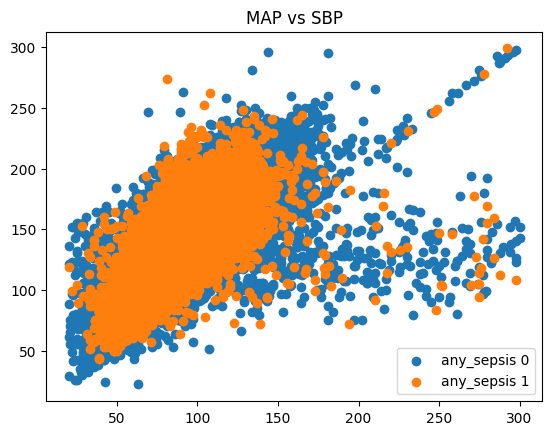

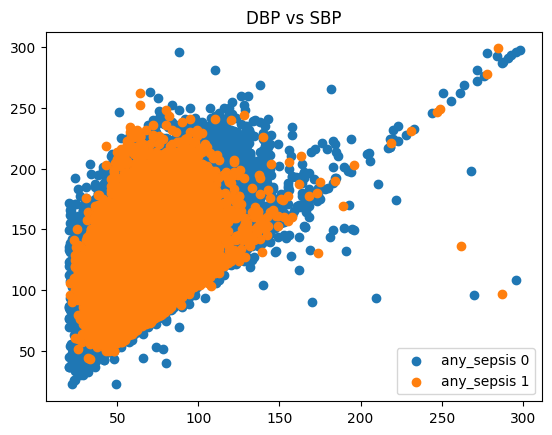

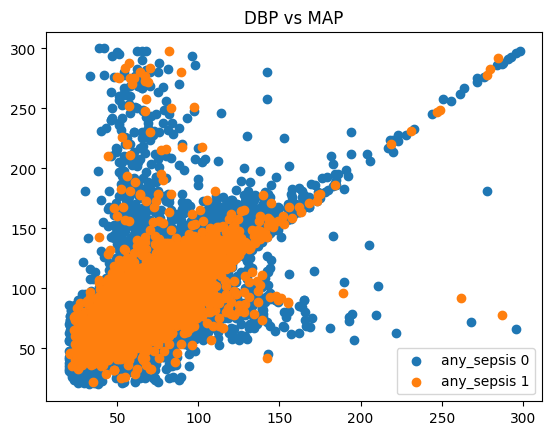

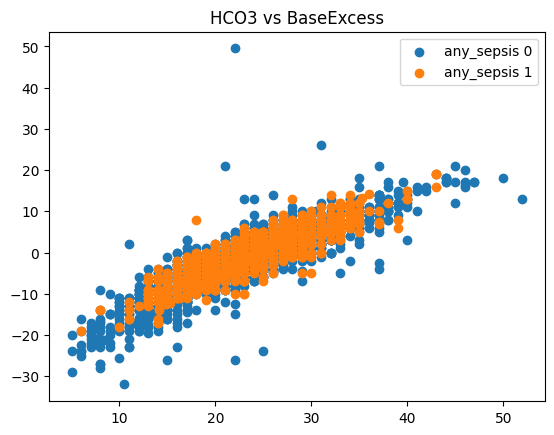

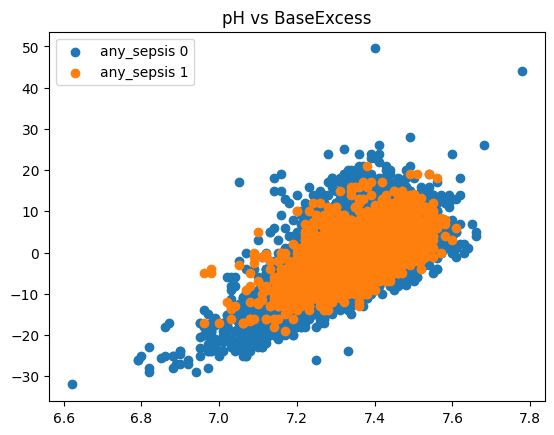

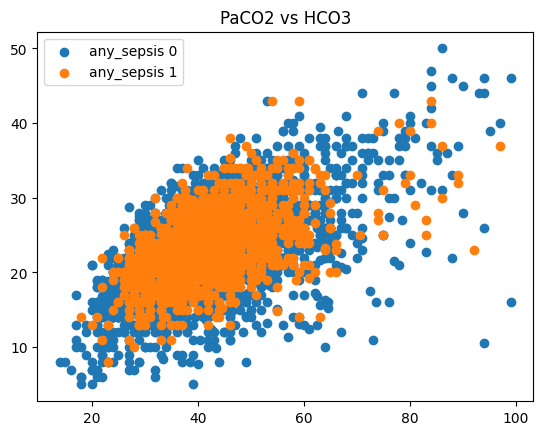

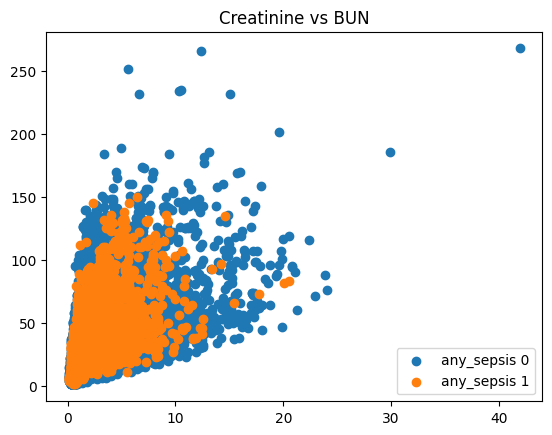

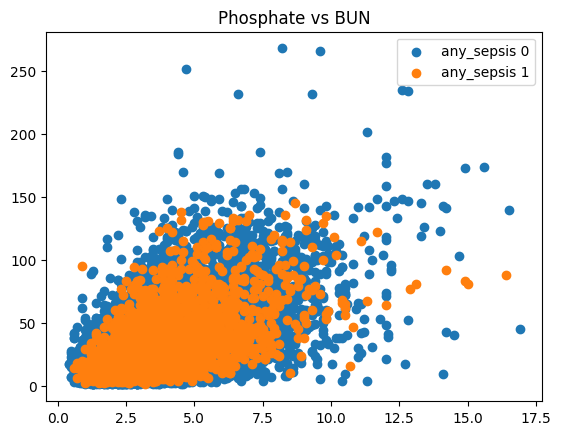

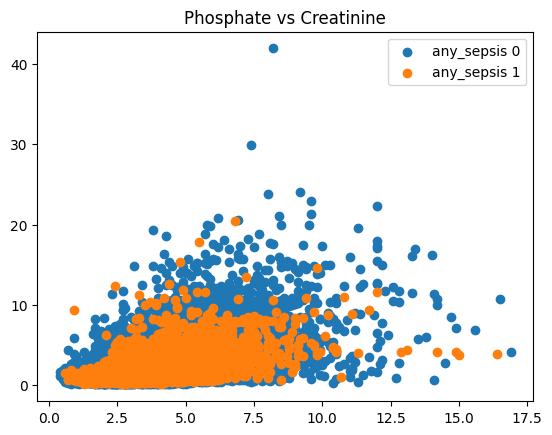

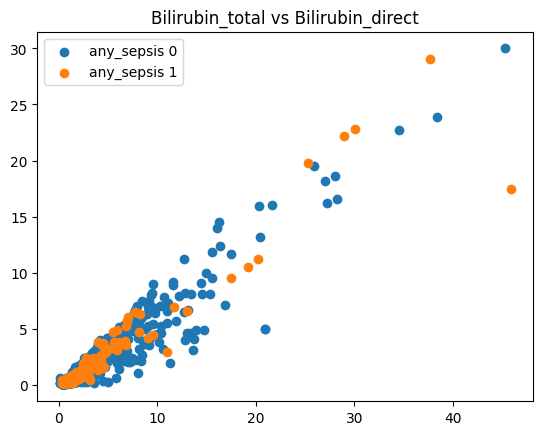

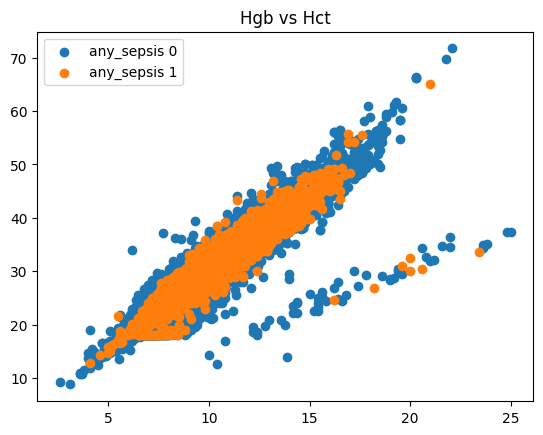

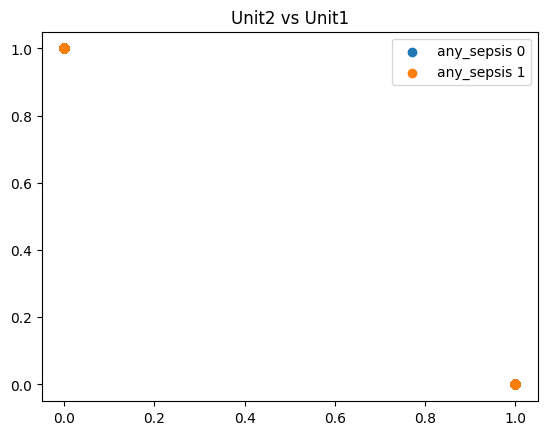

In [39]:
for pair in not_nan_corrs.keys():
    plot_corr(pair[0], pair[1], "any_sepsis", [0, 1])

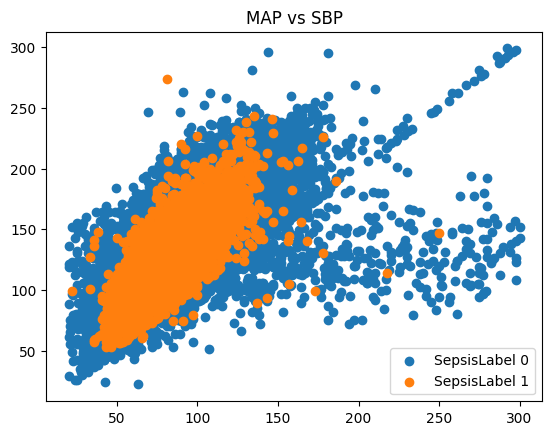

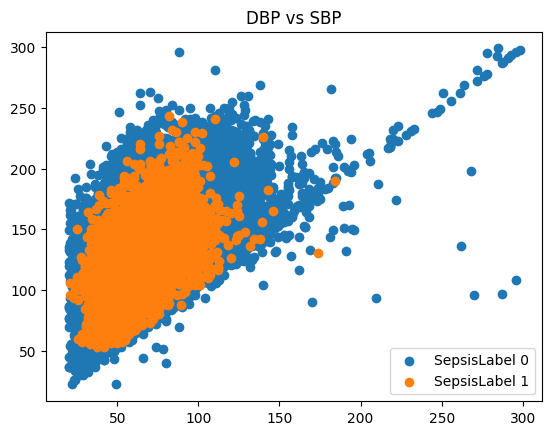

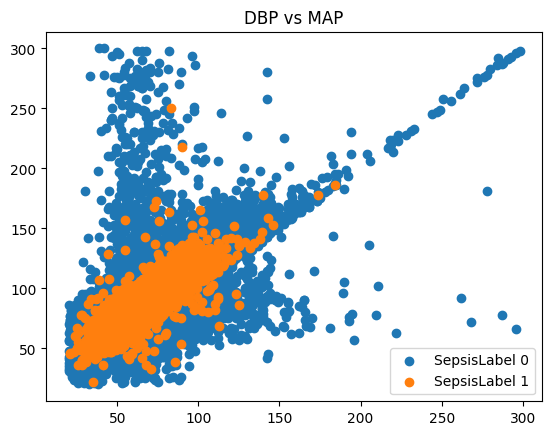

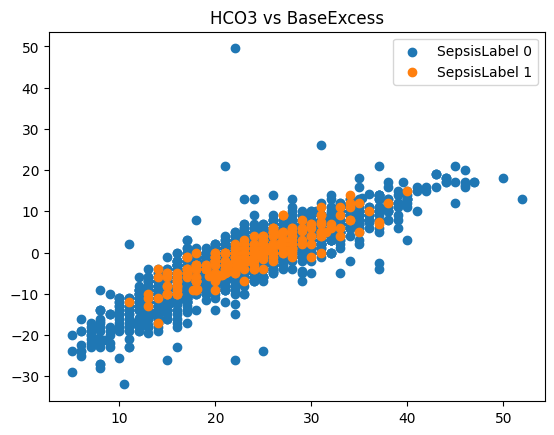

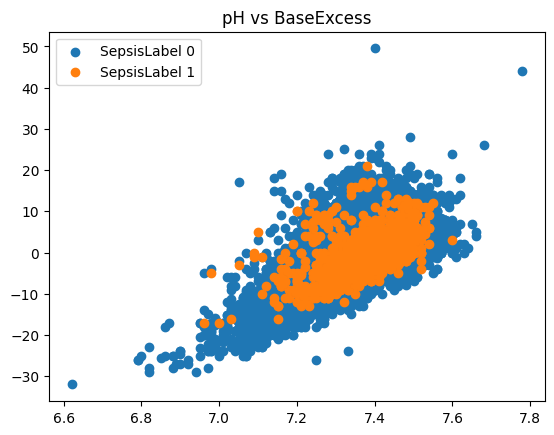

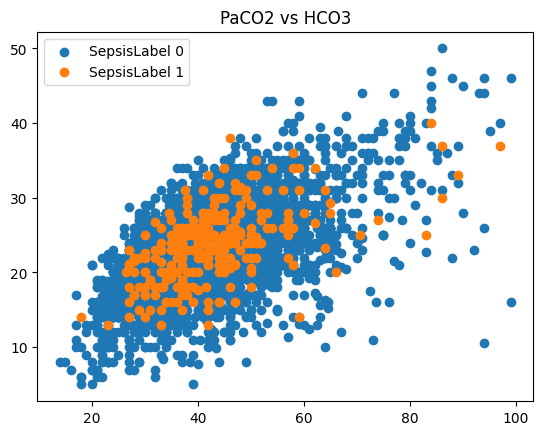

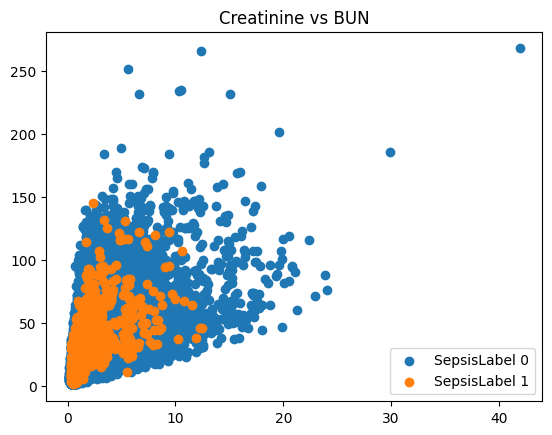

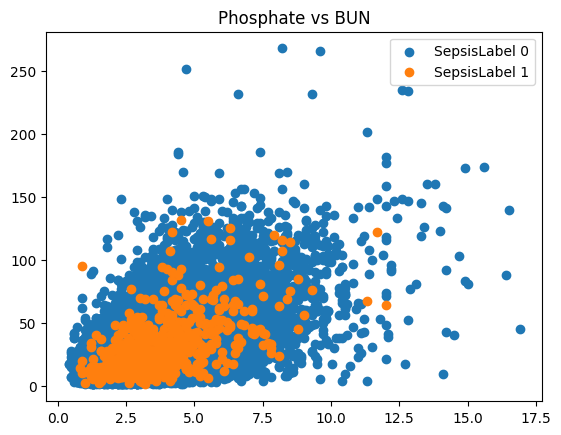

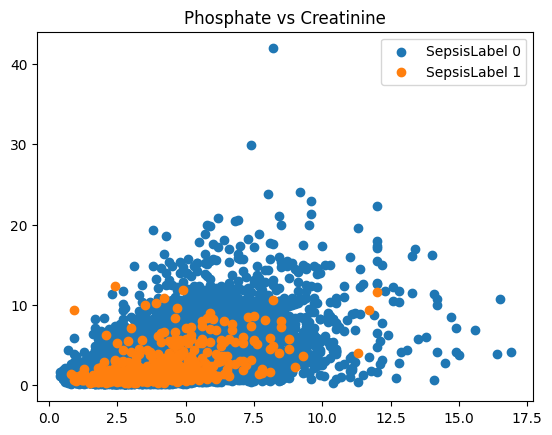

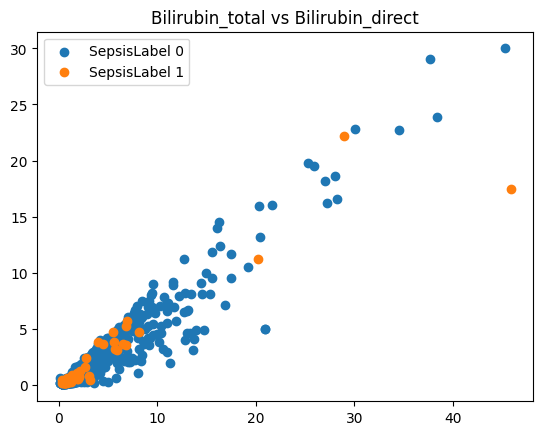

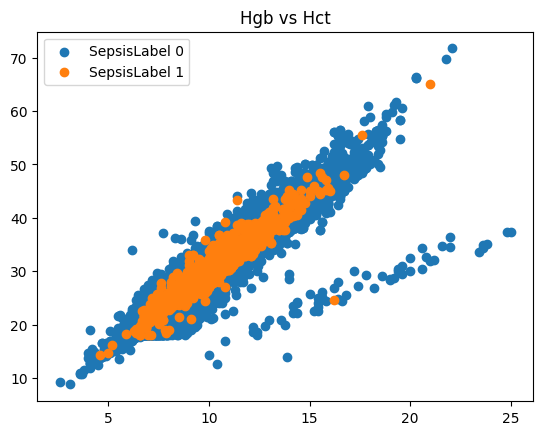

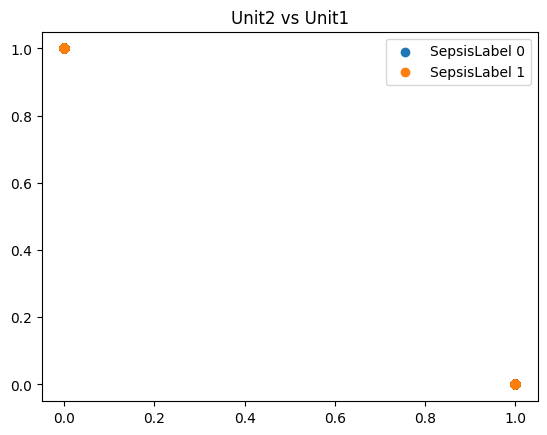

In [52]:
for pair in not_nan_corrs.keys():
    plot_corr(pair[0], pair[1], "SepsisLabel", [0, 1])

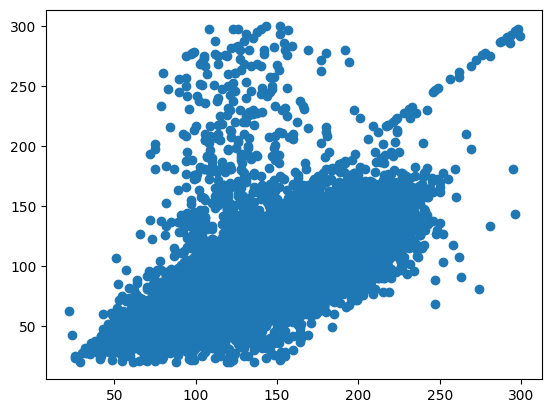

In [34]:
plt.scatter(x=all_df["SBP"], y=all_df["MAP"])
plt.show()

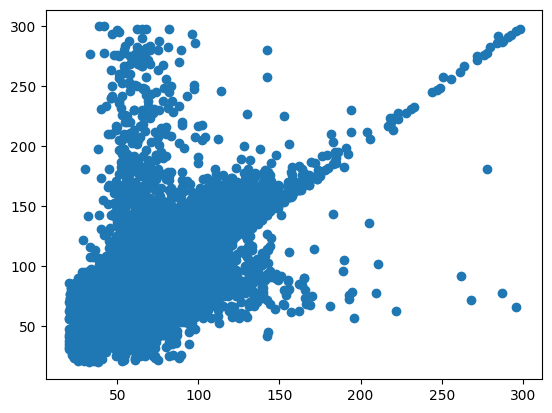

In [24]:
plt.scatter(x=all_df["DBP"], y=all_df["MAP"])
plt.show()

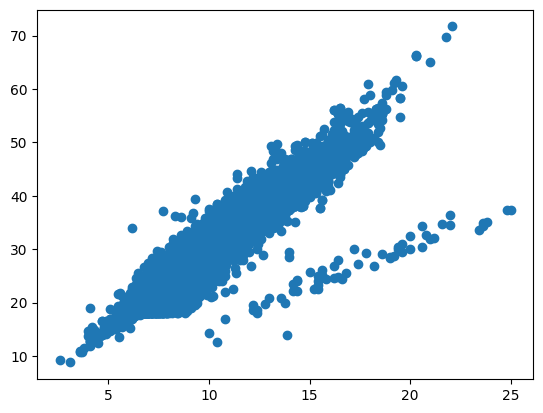

In [25]:
plt.scatter(x=all_df["Hgb"], y=all_df["Hct"])
plt.show()

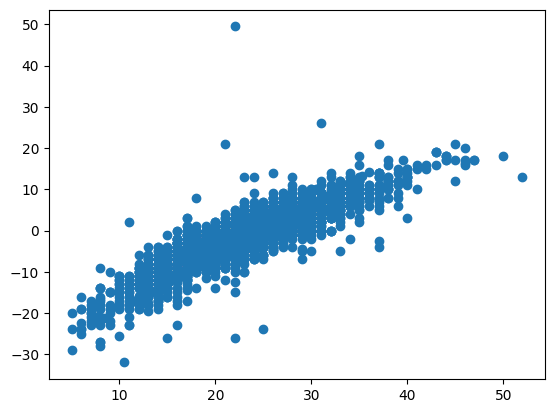

In [27]:
plt.scatter(x=all_df["HCO3"], y=all_df["BaseExcess"])
plt.show()

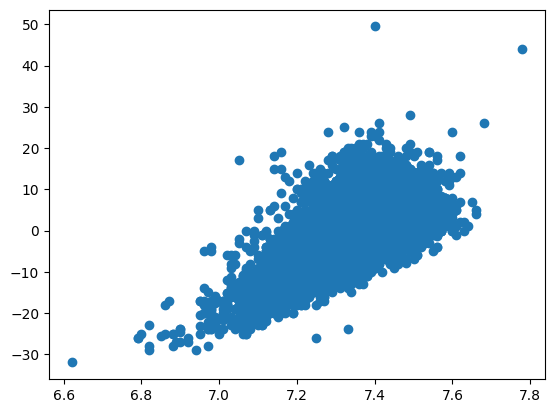

In [38]:
plt.scatter(x=all_df["pH"], y=all_df["BaseExcess"])
plt.show()

In [28]:
def plot_corr(feature1, feature2, seperator, seperator_vals):
    for val in seperator_vals:
        plt.scatter(x=all_df[all_df[seperator] == val][feature1], y=all_df[all_df[seperator] == val][feature2], label = f"{seperator} {val}")
    plt.legend()
    plt.title(f"{feature1} vs {feature2}")
    plt.show()

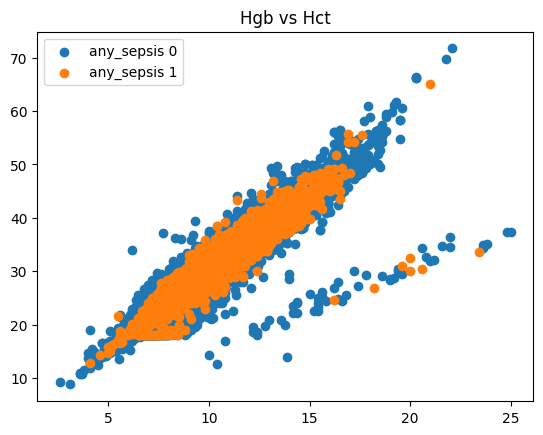

In [29]:
plot_corr("Hgb", "Hct", "any_sepsis", [0, 1])

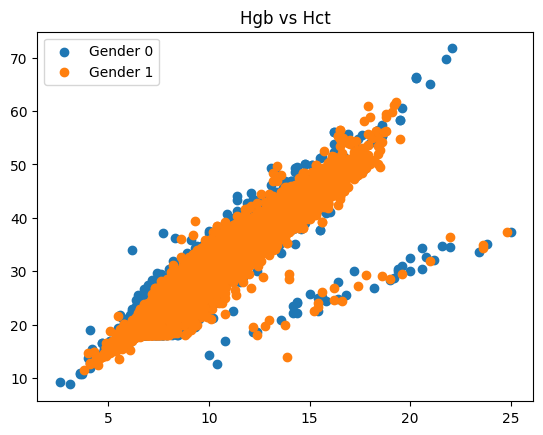

In [31]:
plot_corr("Hgb", "Hct", "Gender", [0, 1])

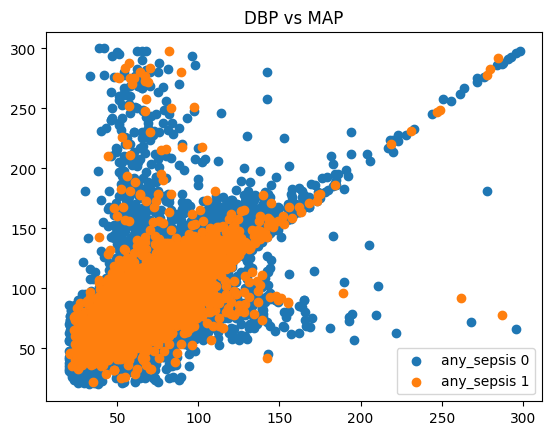

In [32]:
plot_corr("DBP", "MAP", "any_sepsis", [0, 1])

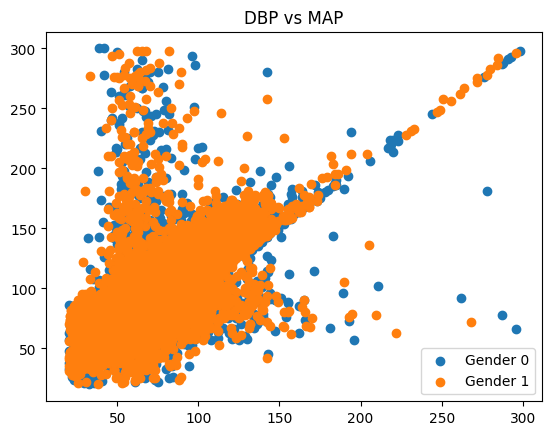

In [33]:
plot_corr("DBP", "MAP", "Gender", [0, 1])

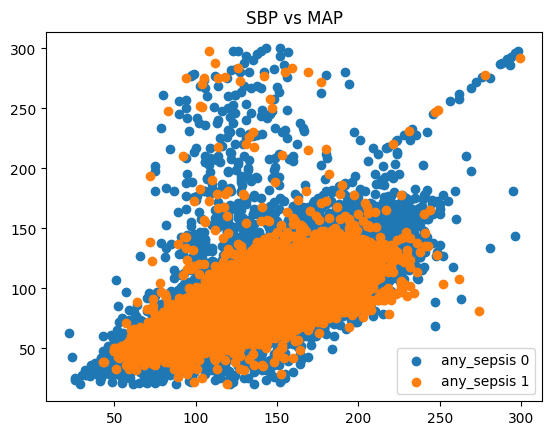

In [35]:
plot_corr("SBP", "MAP", "any_sepsis", [0, 1])